In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from tqdm.notebook import tqdm
import unidecode
import netCDF4 as nc

# Loading

In [20]:
locators = {}
with open('input/combat_locators.txt', 'r') as file:
    contents = file.read().splitlines()
    for line in range(8, len(contents)-4, 6):
        ids = int(contents[line].split("=")[1])
        
        temp = contents[line+1].split(" ")[1:-1]
        locators[ids] = (int(float(temp[0])/2), int(3072-(float(temp[2])/2)))

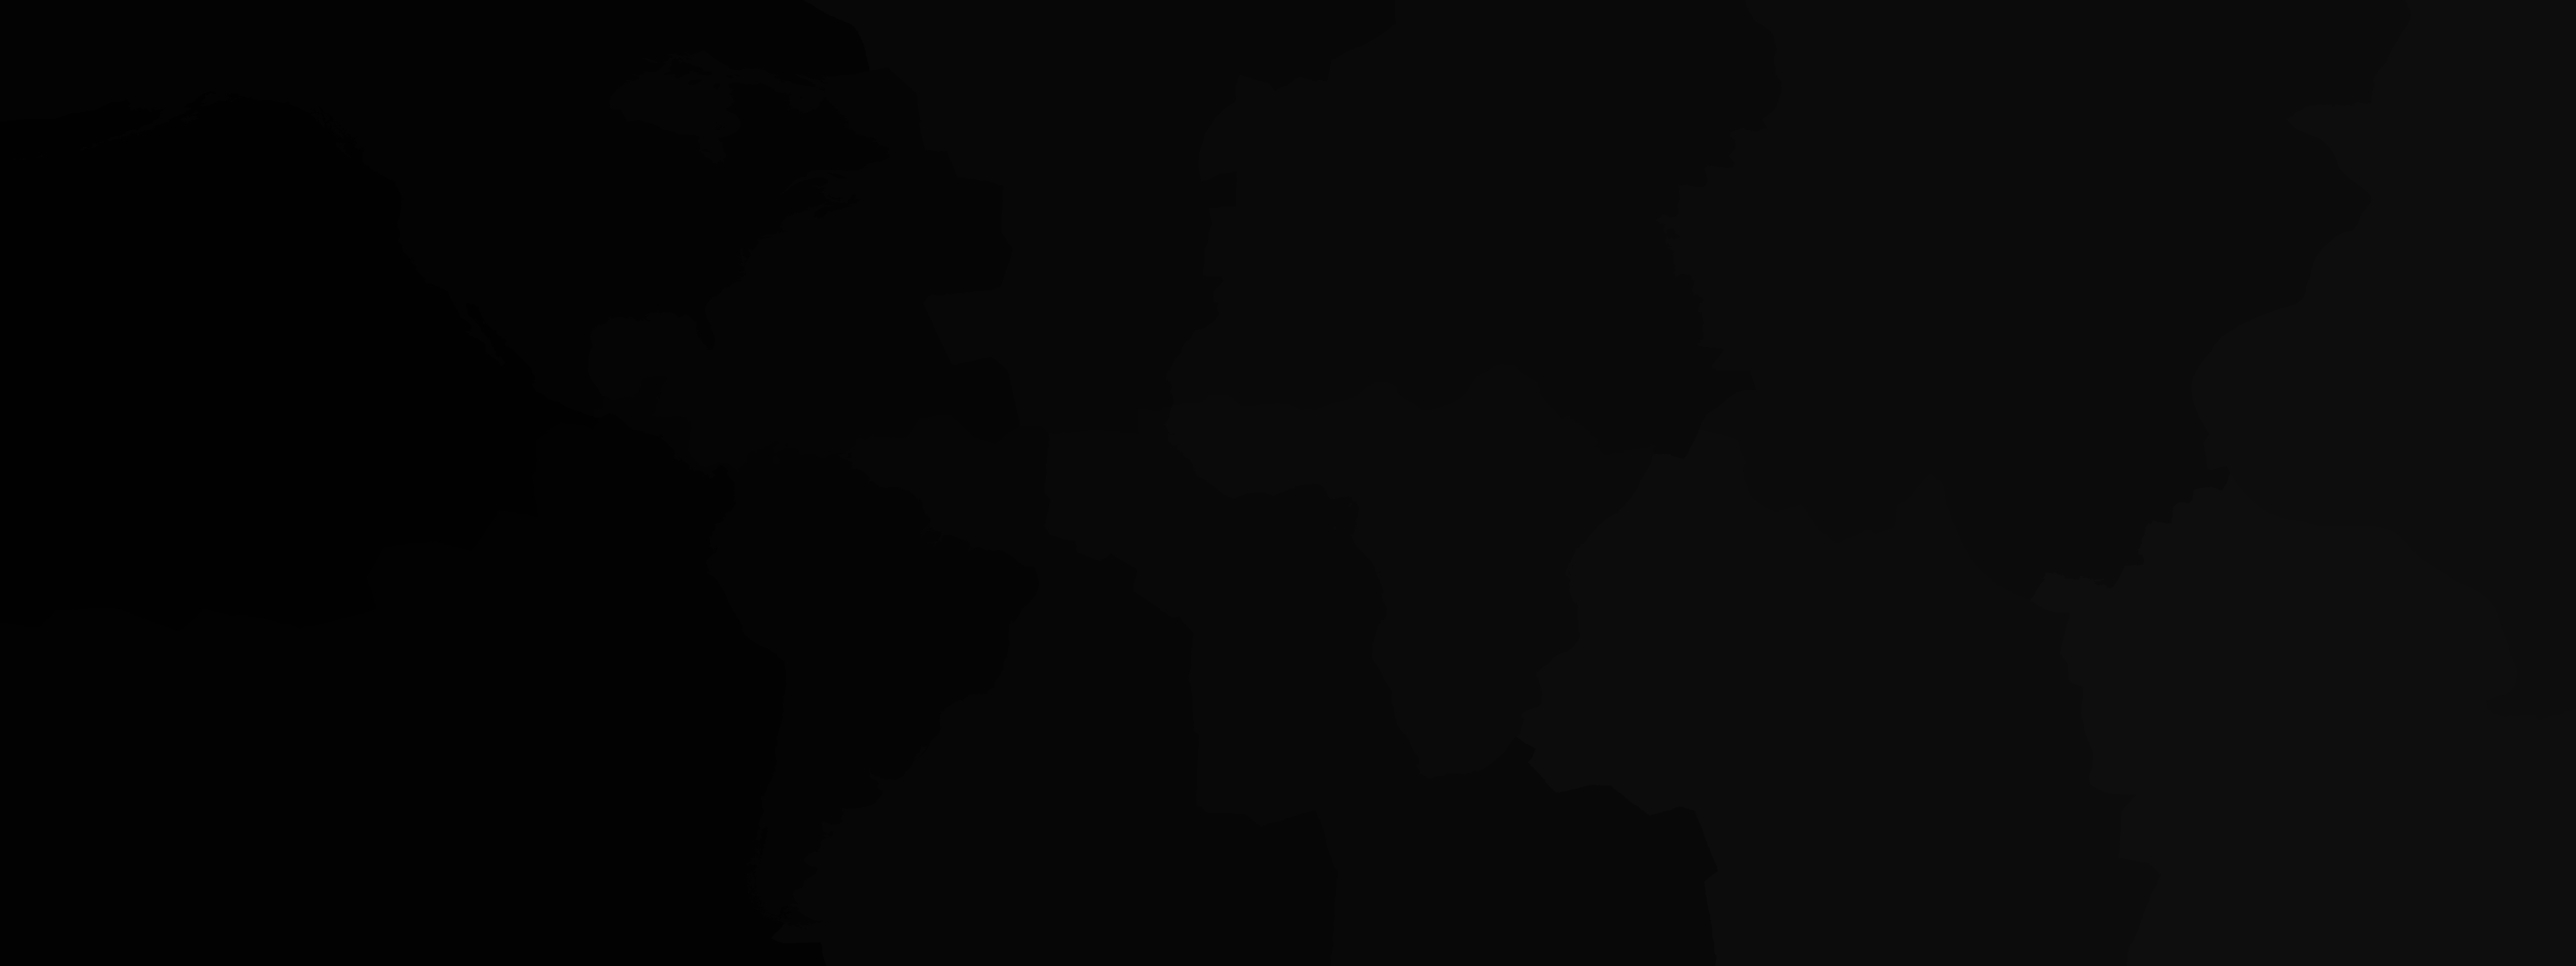

In [16]:
img = Image.open('input/ti_mask.png').convert('L')
display(imgProvs)

In [29]:
impassable = [0, 1]+list(range(5642,5693))
provs = {}
for ids in locators:
    if ids in impassable: continue
    provs[ids] = img.getpixel(locators[ids])

In [34]:
# Province parameters
with open('output/tiSetup.txt','w') as file:
    file.write('namespace = tiSetup\n\ntiSetup.1 = {\n\ttype = country_event\n\n\thidden = yes\n\n\timmediate = {\n')
    for ids in provs:
        file.write(f'\t\tp:{ids} = {"{"} ')
        #XY
        file.write(f'set_variable = {"{"} name = ti_region value = {provs[ids]} {"}"} ')
        file.write('}\n')
    file.write('\t}\n\n}')